**Bootcamp Analysis de Datos Nivel Integrador**\
**Ejercicio Parctico: Semana 2**\
**Monica Lisseth Rojas Peña**

Teniendo en cuenta los conceptos vistos en la clase de preparación y la base de datos llamada Ventas_Productos_USA proporcionada por el Ejecutor realiza los siguientes ejercicios:

# EJERCICIO 1 Análisis Descriptivo:

* Calcula la media, mediana y moda de la columna de ventas.
* Encuentra la desviación estándar y la varianza de las ventas.

In [7]:
#Importando librerias necesarias
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
#Leyendo los datos a un "data frame" con Pandas
df_ventas = pd.read_excel('Venta_Productos_USA.xlsx')
#explorando el data frame 
df_ventas.shape
df_ventas.dtypes

Order ID                   object
Fecha              datetime64[ns]
Cliente Id                 object
Cliente Nombre             object
Segmento                   object
País                       object
Ciudad                     object
Estado                     object
Código Postal               int64
Region                     object
Producto Id                object
Categoria                  object
Subcategoria               object
Nombre Producto            object
Venta                     float64
dtype: object

In [9]:
#Calculando estadisticas-medidas de tendencia central de la columna de vetas 
#media
media_ventas = df_ventas['Venta'].mean()

#mediana
mediana_ventas = df_ventas['Venta'].median()

#moda
moda_ventas = df_ventas['Venta'].mode()

#desviacion estandar
dst_ventas = df_ventas['Venta'].std()

#varianza
varianza_ventas = df_ventas['Venta'].var()

print("Media de ventas= {:.2f}".format(media_ventas))
print("Mediana de ventas= {:.2f}".format(mediana_ventas))
print("Moda de ventas= {:.2f}".format(moda_ventas[0]))
print("Varianza de ventas= {:.2f}".format(varianza_ventas))
print("Desviación estándar de ventas= {:.2f}".format(dst_ventas))

Media de ventas= 230.77
Mediana de ventas= 54.49
Moda de ventas= 12.96
Varianza de ventas= 392692.57
Desviación estándar de ventas= 626.65


# EJERCICIO 2 Distribuciones y Visualización:

Crea un histograma de las ventas para entender la distribución.
Analiza la skewness y kurtosis de la columna de ventas.

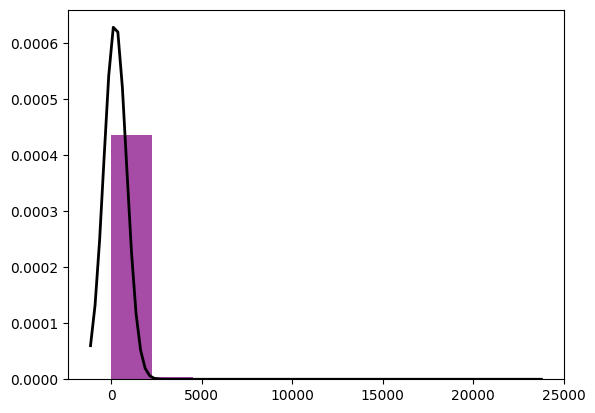

Skewness (Asimetría)= 12.98
Kurtosis (Apuntamiento= 304.29


In [11]:
#ANÁLISIS DEL HISTOGRAMA Y LOS DATOS OBTENIDOS EN ASIMETRÍA Y KURTOSIS

plt.hist(df_ventas['Venta'], color='purple', density=True, alpha= 0.7)

xmin, xmax = plt.xlim()
sc = np.linspace(xmin,xmax, 100)

p= norm.pdf(sc, media_ventas, dst_ventas)

plt.plot(sc,p,'k', linewidth=2)
plt.show()


Venta_col = df_ventas['Venta']
skewness_ventas = stats.skew(Venta_col)
kurtosis_ventas = stats.kurtosis(Venta_col)

print("Skewness (Asimetría)= {:.2f}".format(skewness_ventas))
print("Kurtosis (Apuntamiento= {:.2f}".format(kurtosis_ventas))

Basados en la vizualization del histograma y de los resultados de Asumetria y apuntamiento, los datos de la columna de ventas tienen un asumetri positiva de 12.98 indicada por una distribucion hacia la derecha, y el valor de apuntamiento de 304.29 indica un apuntamiento muy alto, lo que sugiere un pico pronunciado, como se observa en la figura. 

# EJERCICIO 3: Relación entre Variables:

Calcula la covarianza y la correlación entre las ventas y otra variable (código postal Ó producto id).
Interpretar la relación entre las dos variables.

In [5]:
#covarianza y correlacion entre ventas y codigo postal

covarianza = df_ventas[['Venta','Código Postal']].cov().iloc[0,1]
correlacion = df_ventas[['Venta','Código Postal']].corr().iloc[0,1]

print('La covarianza es = ', covarianza)
print('La correlacion es = ', correlacion)

La covarianza es =  -514186.9478830208
La correlacion es =  -0.025588200900250383


# EJERCICIO 4 Análisis Temporal:

Convierte la columna de fecha al formato adecuado.
Analiza las ventas a lo largo del tiempo mediante una línea de tiempo o gráfico de series temporales.

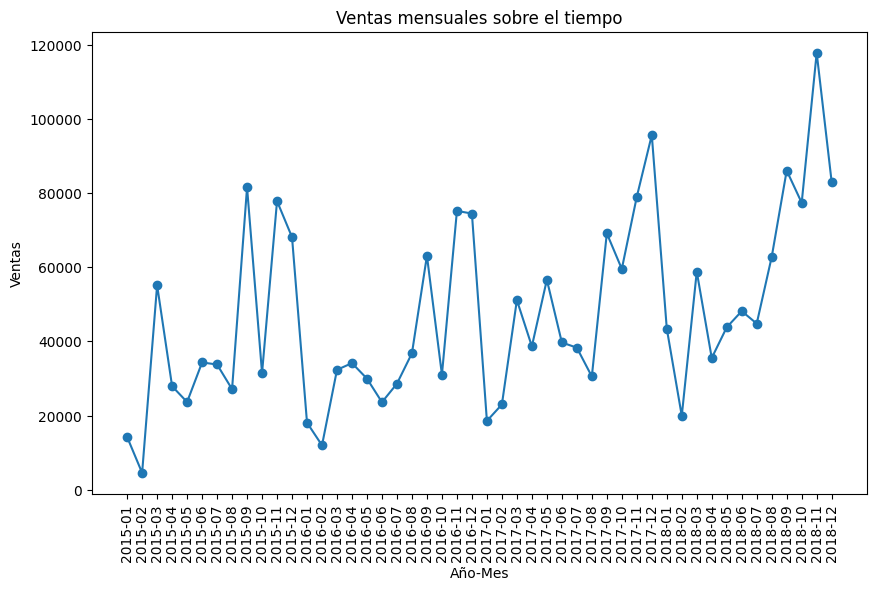

In [83]:
#columna de ventas a formato datetime
df_ventas['Fecha']= pd.to_datetime(df_ventas['Fecha'])
# Extraemos año y mesde la columna de 'Fecha'
df_ventas['anio_mes'] = df_ventas['Fecha'].dt.to_period('M')

# Group by year-month and sum the sales
ventas_mensual = df_ventas.groupby('anio_mes')['Venta'].sum().reset_index()
# Convertimos la columna 'anio_mes' a formato strings
ventas_mensual['anio_mes'] = ventas_mensual['anio_mes'].astype(str)


# Grafico de series temporales 'Venta'
plt.figure(figsize=(10, 6))
plt.plot(ventas_mensual['anio_mes'], ventas_mensual['Venta'], marker='o', linestyle='-')
plt.xlabel('Año-Mes')
plt.ylabel('Ventas')
plt.title('Ventas mensuales sobre el tiempo')
plt.xticks(rotation=90)  #rota el axis x para mejor lectura
plt.show()

La grafica de series no muestra las flutuaciones de ventas en un periodo de Enero de 2015 a diciembre del 2028. Basados en esta grafica podemos decir que el mes con mayores ventas fue noviembre del 2018 y el mes con menores ventas fue Febrero de 2015.

# EJERCICIO 5 Segmentación y Comparación:

Agrupa los datos por segmento y calcula las estadísticas descriptivas para las ventas dentro de cada segmento.
Compara las ventas entre diferentes regiones o ciudades.

In [15]:
#Agrupar los datos por segmentony calcular estadisticas descriptivas
df_ventas_seg = df_ventas.groupby('Segmento')['Venta'].describe()
print(df_ventas_seg)

#comparar las ventas entre differentes regiones
df_ventas_reg = df_ventas.groupby('Region')['Venta'].sum()
print(df_ventas_reg)

              count        mean         std    min      25%     50%      75%  \
Segmento                                                                       
Consumer     5101.0  225.065777  588.933757  0.444  17.2800  53.982  208.560   
Corporate    2953.0  233.150720  600.111546  0.556  17.3800  56.300  213.080   
Home Office  1746.0  243.403309  762.862506  0.990  17.0675  52.560  211.692   

                  max  
Segmento               
Consumer     13999.96  
Corporate    17499.95  
Home Office  22638.48  
Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Venta, dtype: float64


* Aunque el segmento costume tiene mayo conteo (5101.0), home office tiene una media (243.40) mayor y una variabilidad mayor tambien con una desviacion estandar de 762.86

* El are oeste (west) tiene mayor cantidad de ventas (710219.6845), y elm la region sur (south) una menor (389151.4590)

# EJERCICIO 6 Pruebas de Hipótesis:

Formula una hipótesis sobre la relación entre dos variables (por ejemplo, ventas y categoría de producto).
Realiza una prueba de hipótesis para validar o rechazar la hipótesis.

H0 = No hay diferencia significativa en ventas entre las diferentes categorias de producto
Ha = Almenos una de las categorias de producto es diferente en ventas

In [86]:
# Extrayendo las categorias unicas en el dataframe
categorias_unicas = df_ventas['Categoria'].unique()

# Categorias
print(categorias_unicas)

['Furniture' 'Office Supplies' 'Technology']


* Como hay tres categorias 'Furniture' 'Office Supplies' 'Technology' se have un analysis de varianza ANOVA que es una técnica estadística que se utiliza para comparar la media de tres o más grupos y determinar si existen diferencias significativas entre ellas. 

Nuestras hipotesis son:

H0: No hay diferencia significativa entre las categorias de productos.
H1: Hay differencias significativas en entre las categorias de productos.

In [93]:
from scipy.stats import f_oneway

# Extraemos los valores de ventas por categora de productos
ventas_furniture = df_ventas[df_ventas['Categoria'] == 'Furniture']['Venta']
ventas_office_supplies = df_ventas[df_ventas['Categoria'] == 'Office Supplies']['Venta']
ventas_technology = df_ventas[df_ventas['Categoria'] == 'Technology']['Venta']


# Hacemos un prueba de (multipes grupos) ANOVA
f_statistic, p_value = f_oneway(ventas_furniture, ventas_office_supplies, ventas_technology)

# Resultados
print("F-statistic= {:.2f}".format(f_statistic))
print("p-value= {:.2f}".format(p_value))

F-statistic= 262.16
p-value= 0.00


In [95]:
# Interpretamos los resultados
if p_value < 0.05:
    print("El p-valor es menor que 0.05, por ende rechazamos la hipotesis nula. Hay differencias significativas en entre las categorias de productos.")
else:
    print("El p-valor es mayor que 0.05, por ende fallamos en rechazar la hipotesis nula. No hay diferencia significativa entre las categorias de productos.")

El p-valor es menor que 0.05, por ende rechazamos la hipotesis nula. Hay differencias significativas en entre las categorias de productos.
